In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Логистическая регрессия. Упражнение 3

                     chocolate  fruity  caramel  ...  pricepercent  winpercent  Y
competitorname                                   ...                             
100 Grand                    1       0        1  ...         0.860   66.971725  1
3 Musketeers                 1       0        0  ...         0.511   67.602936  1
One dime                     0       0        0  ...         0.116   32.261086  0
One quarter                  0       0        0  ...         0.511   46.116505  0
Air Heads                    0       1        0  ...         0.511   52.341465  1
...                        ...     ...      ...  ...           ...         ... ..
Snickers                     1       0        1  ...         0.651   76.673782  1
Snickers Crisper             1       0        1  ...         0.651   59.529251  1
Sour Patch Kids              0       1        0  ...         0.116   59.863998  1
Starburst                    0       1        0  ...         0.220   67.037628  1
Strawberry bon b

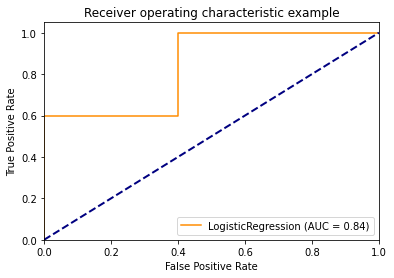

In [ ]:
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
import pandas as pd
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')
TEST = pd.read_csv("candy-test.csv", delimiter=',', index_col='competitorname')

#обучение модели будем проводить на данных, за исключением некоторых конфет
rows_to_exclude = 'Nestle Crunch, Skittles wildberry, Sour Patch Tricksters'.split(', ')
train_data = DATA.drop(rows_to_exclude)
print(train_data)

#отбор данных для предикторов, удаление дввух последних столбцов, индекс не включается в данные автоматически.
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))
#отбор столбца для отклика
y = pd.DataFrame(train_data['Y'])

# Обучение модели логистической регрессии

reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

#предсказание для сладости из таблицы
#выбор строки из таблицы

# Оценка модели с помощью тестовых данных
X_test = pd.DataFrame(TEST.drop(['Y'], axis=1))
Trolli = X_test.loc['Trolli Sour Bites',:].to_frame().T
Twizzlers = X_test.loc['Twizzlers',:].to_frame().T
trolli_probability = reg.predict_proba(Trolli)
twizzlers_probability = reg.predict_proba(Twizzlers)

# Вычисление метрик
#отбор отклика Y из тестовых данных и преобразование в массив

#предсказание с помощью обученной модели, порог отсечения по умолчанию составляет 0.5
Y_pred = reg.predict(X_test)

#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно
Y_pred_probs = reg.predict_proba(X_test)

#отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]

Y_true = (TEST['Y'].to_frame().T).values.ravel()

fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)

#вычисляем AUC
auc = metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

#вычисление Recall
recall = metrics.recall_score(Y_true, Y_pred)

#вычисление Precision
precision = metrics.precision_score(Y_true, Y_pred)

print('trolli probability: {}'.format(trolli_probability[:, 1]))
print('twizzlers_probability: {}'.format(twizzlers_probability[:, 1]))
print('tpr: ', tpr)
print('auc: ', auc)
print('recall: ', recall)
print('precision: ', precision)


metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()